### Earth Analytics Bootcamp - Practice Activity on Data Structures
<b>Author</b>: Mike Dorfman

In [47]:
# Import necessary packages
import numpy as np
import pandas as pd
import urllib
import os
import matplotlib.pyplot as plt

print("Packages imported.")

Packages imported.


In [48]:
# Make the average monthly temperature list for Boulder, CO
temp_monthly_avg_list = [0.0,
                    2.00,
                    5.0,
                    9.56,
                    14.39,
                    21.72,
                    16.72,
                    11.61,
                    4.89,
                    0.99]

In [49]:
# Insert June and July temperatures into this list
temp_monthly_avg_list.insert(5, 19.56)
temp_monthly_avg_list.insert(6, 22.78)
print(temp_monthly_avg_list)

[0.0, 2.0, 5.0, 9.56, 14.39, 19.56, 22.78, 21.72, 16.72, 11.61, 4.89, 0.99]


In [50]:
# From the same data, explicitly create a numpy vector
temp_monthly_avg_array_1 = np.array([0.0,
                                     2.00,
                                     5.0,
                                     9.56,
                                     14.39,
                                     21.72,
                                     16.72,
                                     11.61,
                                     4.89,
                                     0.99])

# From the same data, pass the list to np.array() to create a numpy vector
temp_monthly_avg_array_2 = np.array(temp_monthly_avg_list)

In [51]:
# Set the working directory as our data directory (in parent directory)
os.chdir("../data")

file_path_target = "avg-monthly-temp.txt"

# Download average monthly temperature for Boulder, CO
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12732467", 
                           filename = file_path_target)
print("Datasets downloaded successfully")

# Load into numpy array
avg_monthly_temp_c_array = np.loadtxt(fname = file_path_target, delimiter = ",")

Datasets downloaded successfully


In [52]:
# Make subset of March, April, May
avg_monthly_temp_c_march_to_may_array = avg_monthly_temp_c_array[2:5]

# Find the mean of this array and print
avg_monthly_temp_c_march_to_may_mean = np.mean(avg_monthly_temp_c_march_to_may_array)
print("Mean of Spring Average Monthly Temperatures: %s" % avg_monthly_temp_c_march_to_may_mean)

# Make subset of Sept, Oct, Nov
avg_monthly_temp_c_sept_to_nov_array = avg_monthly_temp_c_array[8:11]

# Find the mean of this array and print
avg_monthly_temp_c_sept_to_nov_mean = np.mean(avg_monthly_temp_c_sept_to_nov_array)
print("Mean of Fall Average Monthly Temperatures: %s" % avg_monthly_temp_c_sept_to_nov_mean)

Mean of Spring Average Monthly Temperatures: 9.65
Mean of Fall Average Monthly Temperatures: 11.073333333333332


In [53]:
# From the same data, explicitly create a pandas dataframe
avg_monthly_temp_c_df = pd.DataFrame(columns=["Month", "Temp"], 
                              data=[["January", 0.00],
                                    ["February", 2.00],
                                    ["March", 5.00],
                                    ["April", 9.56],
                                    ["May", 14.39],
                                    ["June", 19.56],
                                    ["July", 22.78],
                                    ["August", 21.72],
                                    ["September", 16.72],
                                    ["October", 11.61],
                                    ["November", 4.89], 
                                    ["December", 0.99]] )
avg_monthly_temp_c_df

,Month,Temp
0,January,0.00
1,February,2.00
2,March,5.00
3,April,9.56
4,May,14.39
5,June,19.56
6,July,22.78
7,August,21.72
8,September,16.72
9,October,11.61


In [54]:
# Working directory already set as our data directory (in parent directory)
file_path_target = "avg-temp-months-seasons.csv"

# Download average monthly temperature for Boulder, CO
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12739457", 
                           filename = file_path_target)
print("Datasets downloaded successfully")

# Load into pandas dataframe
# This will overwrite the previous variable (explicitly-created dataframe), but we will not be using that variable any more
avg_monthly_temp_c_df = pd.read_csv(file_path_target)
avg_monthly_temp_c_df

Datasets downloaded successfully


,months,temp,seasons
0,Jan,0.00,Winter
1,Feb,2.00,Winter
2,Mar,5.00,Spring
3,Apr,9.56,Spring
4,May,14.39,Spring
5,June,19.56,Summer
6,July,22.78,Summer
7,Aug,21.72,Summer
8,Sept,16.72,Fall
9,Oct,11.61,Fall


In [55]:
# Select seasons and summarize the data in each season
# Without using "print()" explicitly, I can't get the description to show up for each month - just the last one

avg_monthly_temp_c_winter_df = avg_monthly_temp_c_df.loc[avg_monthly_temp_c_df['seasons'] == "Winter"]
print(avg_monthly_temp_c_winter_df.describe())

avg_monthly_temp_c_spring_df = avg_monthly_temp_c_df.loc[avg_monthly_temp_c_df['seasons'] == "Spring"]
print(avg_monthly_temp_c_spring_df.describe())

avg_monthly_temp_c_summer_df = avg_monthly_temp_c_df.loc[avg_monthly_temp_c_df['seasons'] == "Summer"]
print(avg_monthly_temp_c_summer_df.describe())

avg_monthly_temp_c_fall_df = avg_monthly_temp_c_df.loc[avg_monthly_temp_c_df['seasons'] == "Fall"]
print(avg_monthly_temp_c_fall_df.describe())

           temp
count  3.000000
mean   0.996667
std    1.000017
min    0.000000
25%    0.495000
50%    0.990000
75%    1.495000
max    2.000000
            temp
count   3.000000
mean    9.650000
std     4.695647
min     5.000000
25%     7.280000
50%     9.560000
75%    11.975000
max    14.390000
            temp
count   3.000000
mean   21.353333
std     1.641016
min    19.560000
25%    20.640000
50%    21.720000
75%    22.250000
max    22.780000
            temp
count   3.000000
mean   11.073333
std     5.933231
min     4.890000
25%     8.250000
50%    11.610000
75%    14.165000
max    16.720000


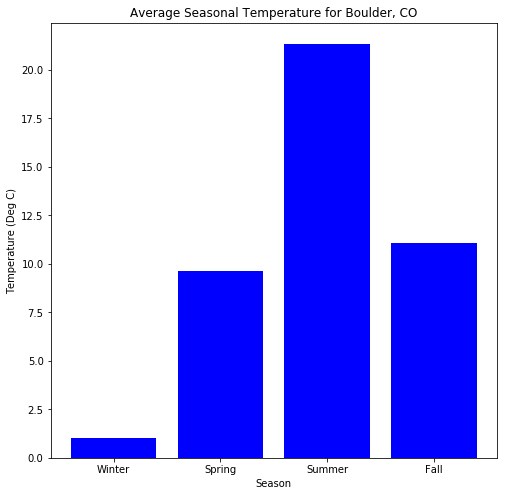

In [56]:
# Create a pandas dataframe with the mean value for each season above
avg_seasonal_temp_c_df = pd.DataFrame(columns=["Season", "Temp"], 
                              data=[["Winter", 0.997],
                                    ["Spring", 9.65],
                                    ["Summer", 21.353],
                                    ["Fall", 11.073]] )

# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (8, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(avg_seasonal_temp_c_df.Season, avg_seasonal_temp_c_df.Temp, color="blue")

# set plot title
ax.set(title="Average Seasonal Temperature for Boulder, CO")

# add labels to the axes
ax.set(xlabel="Season", ylabel="Temperature (Deg C)");